In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA


In [2]:
data = load_breast_cancer()
X, y = data.data, data.target


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)


In [6]:
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

In [7]:
def evaluate(model_name, y_test, y_pred):
    print(f"--- {model_name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


In [8]:
evaluate("Linear SVM", y_test, y_pred_linear)
evaluate("RBF SVM", y_test, y_pred_rbf)


--- Linear SVM Evaluation ---
Accuracy: 0.956140350877193
Confusion Matrix:
 [[41  2]
 [ 3 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

--- RBF SVM Evaluation ---
Accuracy: 0.9736842105263158
Confusion Matrix:
 [[41  2]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



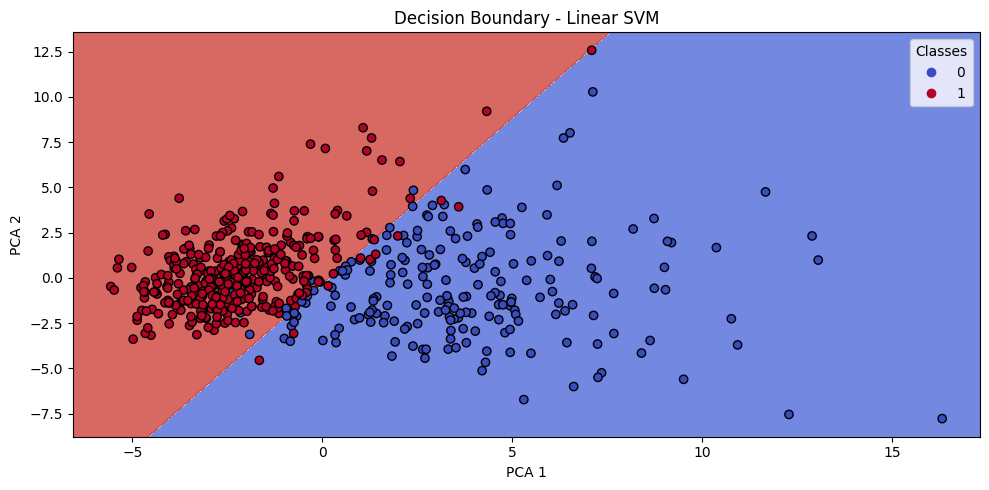

In [ ]:
# Visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 5))
for model, name in zip([linear_svm, rbf_svm], ['Linear SVM', 'RBF SVM']):
    plt.clf()
    model.fit(X_pca, y)
    h = .02
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title(f"Decision Boundary - {name}")
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.tight_layout()
    plt.show()